사람 얼굴 p203

In [44]:
from sklearn.datasets import fetch_lfw_people
import matplotlib.pyplot as plt
import numpy as np

In [45]:
people = fetch_lfw_people(min_faces_per_person=5, resize=0.7) # Download

In [73]:
people.target.shape, len(set(people.target_names)), people.images.shape

((5985,), 423, (5985, 87, 65))

In [74]:
from sklearn.linear_model import RidgeClassifier
from sklearn.model_selection import train_test_split

In [76]:
x = people.data
y = people.target
X_train, X_test, y_train, y_test = train_test_split(x,y)

In [78]:
model = RidgeClassifier(alpha=10).fit(X_train,y_train)

C:\Users\wtime\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:165: LinAlgWarning: Ill-conditioned matrix (rcond=7.41888e-11): result may not be accurate.
  overwrite_a=False)


In [80]:
model.score(X_train,y_train), model.score(X_test,y_test)

(1.0, 0.06613226452905811)

오버피팅!! PCA 해서 다시 도전

In [81]:
pca = PCA(n_components=10*10, whiten=True).fit(people.data) # whiten : 정규화

In [83]:
pca_x = pca.transform(people.data)

In [86]:
X_train, X_test, y_train, y_test = train_test_split(pca_x, y)
model = RidgeClassifier(alpha=1).fit(X_train,y_train)

In [89]:
model.score(X_train,y_train), model.score(X_test,y_test) # 좀 더 낫다

(0.24910873440285206, 0.18370073480293922)

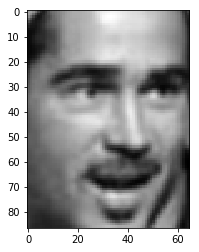

In [90]:
plt.imshow(people.images[5984], cmap='gray')

In [91]:
#(87 * 65) 이상의 명암을 주성분 100(10 * 10)개 변환해서 시각화
from sklearn.decomposition import PCA

In [92]:
pca = PCA(n_components=10*10, whiten=True).fit(people.data) # whiten : 정규화

In [93]:
pca_x = pca.transform(people.data)

In [94]:
people.data.shape, len(set(people.target_names)),pca_x.shape

((5985, 5655), 423, (5985, 100))

In [95]:
pca_image = np.reshape(pca_x, [-1, 10, 10]) # 100개의 차원을 10X10 으로 모양 변환
pca_image.shape

(5985, 10, 10)

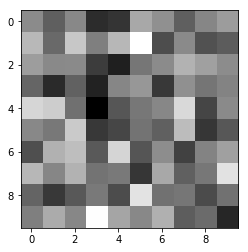

In [96]:
plt.imshow(pca_image[0], cmap='gray')

In [97]:
img = pca.components_.reshape((100,87,65)) # (주성분 갯수, 높이, 너비)
img.shape

(100, 87, 65)

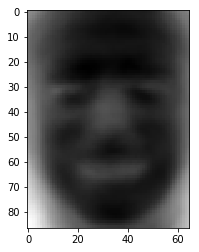

In [98]:
plt.imshow(img[0], cmap='gray')

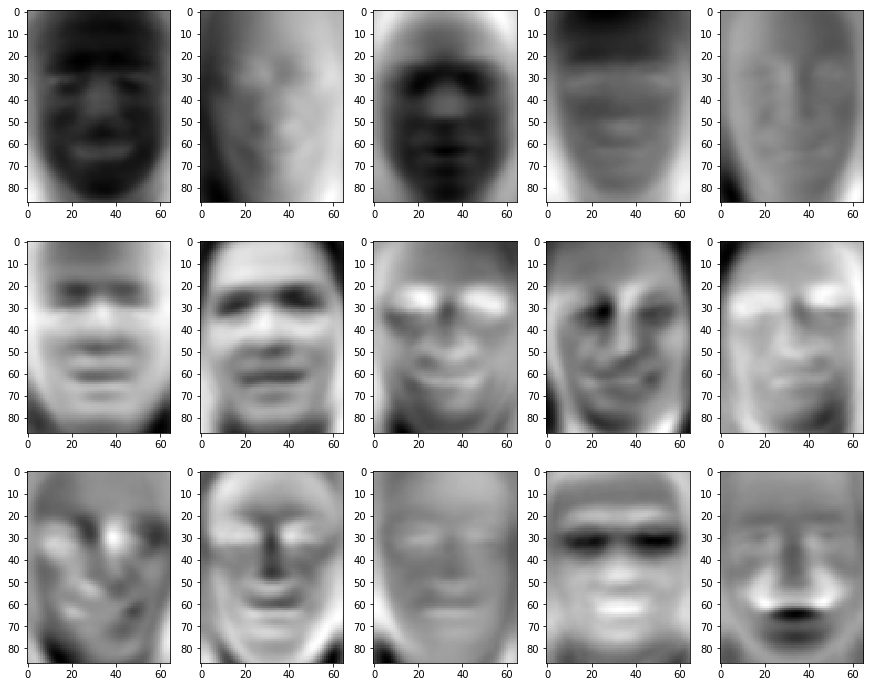

In [99]:
fig, ax = plt. subplots(3,5, figsize=(15,12))

for y in range(3):
    for x in range(5):
        ax[y,x].imshow(img[y*5+x], cmap='gray')